# Практический кейс 1. Анализ банковских данных 

Результат правтической работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### О задании

Практический кейс №1 направлен на работу с пакетом Pandas и Matplotlib путём решения набора задач. В данном задании разрешено пользоваться только стандартной библиотекой языка Python, а также пакетами Pandas, Matplotlib и Seaborn. Целью задания является редактирование данного jupyter notebook-a таким образом, чтобы был написан код, который решает поставленную задачу/отвечает на поставленный вопрос

### Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* За все задание можно набрать **30 первичных баллов**
* Сдавать задание после указанного срока сдачи нельзя
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировкам
* Не оценивается работа целиком, если она была выложена в открытый источник


### Вся работа состоит из трех больших блоков:

- #### Базовые операции с датафреймами (10 баллов)
- #### Вычисление новых признаков и группировка данных (10 баллов)
- #### Визуализация данных (10 баллов)

### Перевод первичных баллов в оценку за работу

Первичные баллы линейно переводятся в 10-бальную систему оценивания:
- 28-30 первичных баллов - 10, отлично
- 25-27 первичных баллов - 9, отлично
- 22-24 первичных баллов - 8, отлично
- 19-21 первичных баллов - 7, хорошо
- 16-18 первичных баллов - 6, хорошо
- 13-15 первичных баллов - 5, хорошо
- 10-12 первичных баллов - 4, удовлетворительно
- 7-9 первичных баллов - 3, удовлетворительно
- 6 баллов и меньше - неудовлетворительно

###  Правила сдачи

Работу необходимо отправить в систему ЦДПО МФТИ в соответствующее задание на странице курса.
**Дедлайн: 5 мая 23:59. После этого времени работы не принимаются.**

### Авторские подсказки

В каждом задании вам даны авторские подсказки - результат выполнения авторского кода для решения этой задачи. Они вам даны просто для понимания, в правильном ли направлении вы идете. Формат вывода вашего кода не обязательно должен совпадать с форматом в подсказках. Главное, чтобы с помощью кода написали нужную функциональность, получили вывод работы кода, а затем ответили на вопрос задачи. Ячейки с ответом изменять не рекомендуется - проводите эксперименты в новых.

Ответы на задачи лучше всего писать не в виде комментариев, а в отдельной ячейке, которую надо перевести из режима ```Code``` в режим ```Markdown```

# Описание задачи

Задача кредитного скоринга - одна из наиболее популярных областей в банковской индустрии, где применяется анализ данных

Признаки клиентов банка:

- ```age``` - возраст (вещественный)
- ```MonthlyIncome``` - месячный доход (вещественный)
- ```DebtRatio``` - Debt-to-income Ratio (вещественный)
- ```NumberOfOpenCreditLinesAndLoans``` - число заемов и кредитных линий
- ```NumberRealEstateLoansOrLines``` - число ипотек и заемов, связанных с недвижимостью (натуральное число)
- ```NumberOfDependents``` - число членов семьи, которых содержит клиент, исключая самого клиента (натуральное число)
- ```defaulted``` - выплачен или не выплачен в конечном итоге кредит заемщиком

В этой работе мы будем исследовать данные о заемщиках и научимся отвечать на вопросы о предоставленных нам данных.

## Базовые операции с датафреймами (10 баллов)

**Задание 1 (1 балл)**

Считайте файл ```credit_data.csv``` в переменную ```df```

In [1]:
import pandas as pd

In [2]:
from google.colab import files
files.upload()

Saving credit_data.csv to credit_data.csv


{'credit_data.csv': b'defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,age_group\n1,45,0.8029821290000001,9120.0,13,6,2.0,2\n0,40,0.12187620099999999,2600.0,4,0,1.0,2\n0,38,0.085113375,3042.0,2,0,0.0,2\n0,30,0.036049682,3300.0,5,0,0.0,1\n0,49,0.024925695,63588.0,7,1,0.0,2\n0,74,0.375606969,3500.0,3,1,1.0,3\n0,57,5710.0,,8,3,0.0,3\n0,39,0.20994001699999998,3500.0,8,0,0.0,2\n0,27,46.0,,2,0,,1\n0,57,0.606290901,23684.0,9,4,2.0,3\n0,30,0.30947621,2500.0,5,0,0.0,1\n0,51,0.53152876,6501.0,7,2,2.0,3\n0,46,0.298354075,12454.0,13,2,2.0,2\n1,40,0.3829647470000001,13700.0,9,1,2.0,2\n0,76,477.0,0.0,6,1,0.0,3\n0,64,0.20989175399999999,11362.0,7,1,2.0,3\n0,78,2058.0,,10,2,0.0,3\n0,53,0.18827406,8800.0,7,0,0.0,3\n0,43,0.527887839,3280.0,7,1,2.0,2\n0,25,0.065868263,333.0,2,0,0.0,1\n0,43,0.430046338,12300.0,10,2,0.0,2\n1,38,0.47584138600000003,3000.0,7,1,2.0,2\n0,39,0.241103559,2500.0,4,0,0.0,2\n0,32,0.085512189,7916.0,6,0,0.0,2\n0,58

In [3]:
df = pd.read_csv('credit_data.csv')

Определите размер таблицы

In [4]:
df.shape

(150000, 8)

(150000, 8)

Посмотрите первые пять строк

In [5]:
df.head()

defaulted  age  ...  NumberOfDependents  age_group
0          1   45  ...                 2.0          2
1          0   40  ...                 1.0          2
2          0   38  ...                 0.0          2
3          0   30  ...                 0.0          1
4          0   49  ...                 0.0          2

[5 rows x 8 columns]

defaulted  age  DebtRatio  MonthlyIncome  NumberOfOpenCreditLinesAndLoans  \
0          1   45   0.802982         9120.0                               13   
1          0   40   0.121876         2600.0                                4   
2          0   38   0.085113         3042.0                                2   
3          0   30   0.036050         3300.0                                5   
4          0   49   0.024926        63588.0                                7   

   NumberRealEstateLoansOrLines  NumberOfDependents  age_group  
0                             6                 2.0          2  
1                             0                 1.0          2  
2                             0                 0.0          2  
3                             0                 0.0          1  
4                             1                 0.0          2

Выведите список названий столбцов

In [6]:
df.columns

Index(['defaulted', 'age', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents', 'age_group'],
      dtype='object')

Index(['defaulted', 'age', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents', 'age_group'],
      dtype='object')

**Задание 2 (1 балл)**

Определите число пропусков в каждом столбце (могут пригодиться методы ```isnull``` и ```sum```)

In [7]:
df.isnull().sum()

defaulted                              0
age                                    0
DebtRatio                              0
MonthlyIncome                      29731
NumberOfOpenCreditLinesAndLoans        0
NumberRealEstateLoansOrLines           0
NumberOfDependents                  3924
age_group                              0
dtype: int64

defaulted                              0
age                                    0
DebtRatio                              0
MonthlyIncome                      29731
NumberOfOpenCreditLinesAndLoans        0
NumberRealEstateLoansOrLines           0
NumberOfDependents                  3924
age_group                              0
dtype: int64

Определите долю пропусков в каждом столбце (могут пригодиться методы ```isnull``` и ```mean```)

In [8]:
df.isnull().mean()

defaulted                          0.000000
age                                0.000000
DebtRatio                          0.000000
MonthlyIncome                      0.198207
NumberOfOpenCreditLinesAndLoans    0.000000
NumberRealEstateLoansOrLines       0.000000
NumberOfDependents                 0.026160
age_group                          0.000000
dtype: float64

defaulted                          0.000000
age                                0.000000
DebtRatio                          0.000000
MonthlyIncome                      0.198207
NumberOfOpenCreditLinesAndLoans    0.000000
NumberRealEstateLoansOrLines       0.000000
NumberOfDependents                 0.026160
age_group                          0.000000
dtype: float64

**Задание 3 (1 балл)** Определите долю заемщиков, которые не выплатили кредит (колонка ```defaulted```)

In [9]:
df.defaulted.mean()

0.06684

0.06684

**Задание 4 (2 балла)** Определите количество заемщиков, у которых ежемесячный доход ```MonthlyIncome``` выше среднего.

In [10]:
len(df[df.MonthlyIncome > df.MonthlyIncome.mean()])

44146

44146

**Задание 5 (2 балла)** Вычислите медианный возраст заемщиков, которые не вернули кредит (```defaulted=1```). Он больше или меньше медианного возраста всех заемщиков?

In [11]:
#медианный возраст тех, кто не вернул кредит
df[df["defaulted"] == 1]["age"].median()

45.0

In [12]:
#медианный возраст всех
df["age"].median()

52.0

In [ ]:
#медианный возраст тех, кто не вернул кредит, меньше

45.0

52.0

**Задание 6 (3 балла)** Сколько заемщиков старше 40 лет имеют ежемесячный доход больше среднего ежемесячного дохода по всей выборке?

In [13]:
len(df[(df["age"] > 40) & (df["MonthlyIncome"] > (df["MonthlyIncome"].mean()))])

37629

defaulted  age  DebtRatio  MonthlyIncome  \
0               1   45   0.802982         9120.0   
4               0   49   0.024926        63588.0   
9               0   57   0.606291        23684.0   
12              0   46   0.298354        12454.0   
15              0   64   0.209892        11362.0   
...           ...  ...        ...            ...   
149979          1   55   0.057235         8700.0   
149981          0   43   0.121752         6849.0   
149989          0   62   0.001408         9233.0   
149991          0   59   0.477658        10316.0   
149999          0   64   0.249908         8158.0   

        NumberOfOpenCreditLinesAndLoans  NumberRealEstateLoansOrLines  \
0                                    13                             6   
4                                     7                             1   
9                                     9                             4   
12                                   13                             2   
15                                    7                             1   
...                                 ...                           ...   
149979                                7                             0   
149981                                4                             0   
149989                                4                             0   
149991                               10                             2   
149999                                8                             2   

        NumberOfDependents  age_group  
0                      2.0          2  
4                      0.0          2  
9                      2.0          3  
12                     2.0          2  
15                     2.0          3  
...                    ...        ...  
149979                 0.0          3  
149981                 4.0          2  
149989                 3.0          3  
149991                 0.0          3  
149999                 0.0          3  

[37629 rows x 8 columns]

## Вычисление новых признаков и группировка данных (10 баллов)

**Задание 7 (2 балла)** Вычислите новый признак ```age_group``` на основе признака ```age```, который разбивает заемщиков на 3 возрастные группы:
- до 30 лет включительно (операция ```<=```) - группа 1
- от 30 лет не включительно и до 50 лет включительно - группа 2
- строго старше 50 лет - группа 3

Для этого заведите отдельную функцию ```calculate_age_group``` и передайте ее в метод ```apply```, который позовете от столбца ```age```

In [ ]:
def calculate_age_group(age):
    if age['age'] <= 30:
        return  ['age_group'] = 1
    elif age['age'] > 50:
        return  ['age_group'] = 3
    else:
        return ['age_group'] = 2

defaulted  age  DebtRatio  MonthlyIncome  NumberOfOpenCreditLinesAndLoans  \
0          1   45   0.802982         9120.0                               13   
1          0   40   0.121876         2600.0                                4   
2          0   38   0.085113         3042.0                                2   
3          0   30   0.036050         3300.0                                5   
4          0   49   0.024926        63588.0                                7   

   NumberRealEstateLoansOrLines  NumberOfDependents  age_group  
0                             6                 2.0          2  
1                             0                 1.0          2  
2                             0                 0.0          2  
3                             0                 0.0          1  
4                             1                 0.0          2

**Задание 8 (1 балл)**
Вычислите количество заемщиков в каждой группе нового вычисленного признака ```age_group``` с помощью метода ```value_counts```

3    79866
2    59376
1    10758
Name: age_group, dtype: int64

**Задание 9 (2 балла)**
Посчитайте долю заемщиков, которые не вернули кредит, в каждой из вычисленных возрастных групп (группировка по возрастной группе и применение метода ```mean``` к колонке ```defaulted```)

age_group
1    0.115635
2    0.088975
3    0.043811
Name: defaulted, dtype: float64

**Задание 10 (1 балл)**
Визуализируйте полученные данные в виде гистограммы

Добавьте сетку на график, дайте графику название

In [ ]:
# Импортируем модуль для визуализации данных
from matplotlib import pyplot as plt

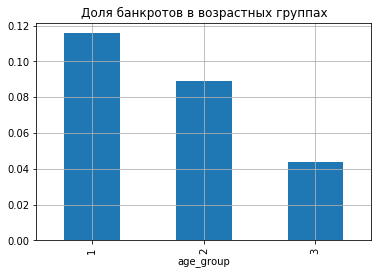

**Задание 11 (1 балл)** Какие выводы вы можете сделать? С увеличением возраста заемщика риск невозврата кредита становится больше или меньше?

**Задание 12 (3 балла)** Вычислите новый признак ```alone_and_poor```, который равен ```1``` у заемщиков, которые не содержат никого, кроме себя (```NumberOfDependents == 0```) и у которых месячный доход (```MonthlyIncome```) меньше 10% квантили по этому признаку среди всех заемщиков. Инече этот признак сделайте равным 0

Для этого напишите функцию ```calculate_alone_and_poor```, в которой вы будете принимать строку, доставать нужные поля у этой строки, и проверять перечисленные выше условия.

Заранее посчитайте значение 10% квантили по столбцу ```MonthlyIncome```, и передайте это значение в функцию как дефолтный аргумент

Затем полученную функцию примените ко всему датайрейму с помощью метода ```apply```. Не забудте указать параметр ```axis=1``` в методе ```apply``` (применять переданную функцию ко строкам), иначе код упадет с ошибкой.

In [ ]:
# 10%-квантиль


2005.0

Сколько получилось людей с признаком ```alone_and_poor``` равным 1?

defaulted  age    DebtRatio  MonthlyIncome  \
14              0   76   477.000000            0.0   
19              0   25     0.065868          333.0   
31              0   24     0.472703          750.0   
38              0   26     0.009990         1000.0   
44              0   68  1687.500000            1.0   
...           ...  ...          ...            ...   
149902          0   80     0.000000         1600.0   
149950          0   61  1940.000000            0.0   
149961          1   31     0.176732         1125.0   
149985          0   26     0.324962         1950.0   
149993          0   22     0.000000          820.0   

        NumberOfOpenCreditLinesAndLoans  NumberRealEstateLoansOrLines  \
14                                    6                             1   
19                                    2                             0   
31                                    1                             0   
38                                    1                             0   
44                                   31                             1   
...                                 ...                           ...   
149902                                1                             0   
149950                               10                             1   
149961                                4                             0   
149985                                4                             0   
149993                                1                             0   

        NumberOfDependents  age_group  alone_and_poor  
14                     0.0          3               1  
19                     0.0          1               1  
31                     0.0          1               1  
38                     0.0          1               1  
44                     0.0          3               1  
...                    ...        ...             ...  
149902                 0.0          3               1  
149950                 0.0          3               1  
149961                 0.0          2               1  
149985                 0.0          1               1  
149993                 0.0          1               1  

[8719 rows x 9 columns]

## Визуализация данных (10 баллов)

**Задание 14 (3 балла)**

Постройте гистограмму распределения возрастов всех заемщиков. Для этого вам может понадобиться метод ```plot.hist()```. Обратите внимание, что у метода ```hist()``` есть параметр ```bins```, который отвечает за мелкость разбиения гистограммы. Постройте два отдельных графика с параметрами ```bins=10``` и ```bins=30```.

Подпишите оси, добавьте сетку на графики, дайте графикам название.

Также не забывайте, что чтобы картинка отрисовалась, нужно последней строкой кода написать ```plt.show()```

In [ ]:
from matplotlib import pyplot as plt

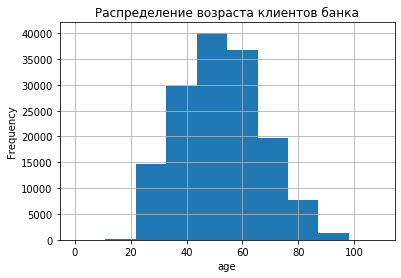

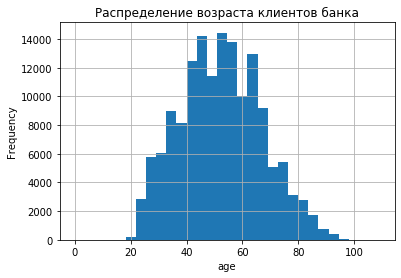

**Задание 15 (2 балла)**
Теперь постройте гистограмму распределения числа открытых кредитных линий (```NumberOfOpenCreditLinesAndLoans```) с помощью функции ```distplot()``` из модуля ```seaborn```

Подпишите оси, добавьте сетку на графики, дайте графику название.

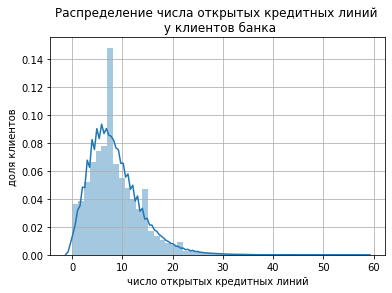

**Задание 16 (1 балл)**
Постройте гистограмму распределения признака ```NumberOfDependents``` для заемщиков, которые успешно вернули кредит (```defaulted = 0```)

Подпишите оси, добавьте сетку на графики, дайте графику название.

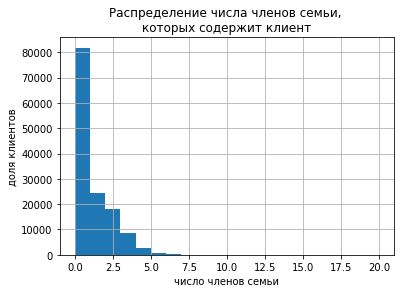

**Задание 17 (3 балла)**
Вычислите среднее значение признака ```NumberOfDependents``` для каждого возраста (```groupby``` по возрасту и ```mean``` от столбца ```NumberOfDependents```) и постройте гистограмму распределения полученных значений (```plot.bar()```)

Сделайте график покрупнее, например 14 на 10 дюймов с помощью параметра ```figsize```

Подпишите оси, добавьте сетку на графики, дайте графику название.

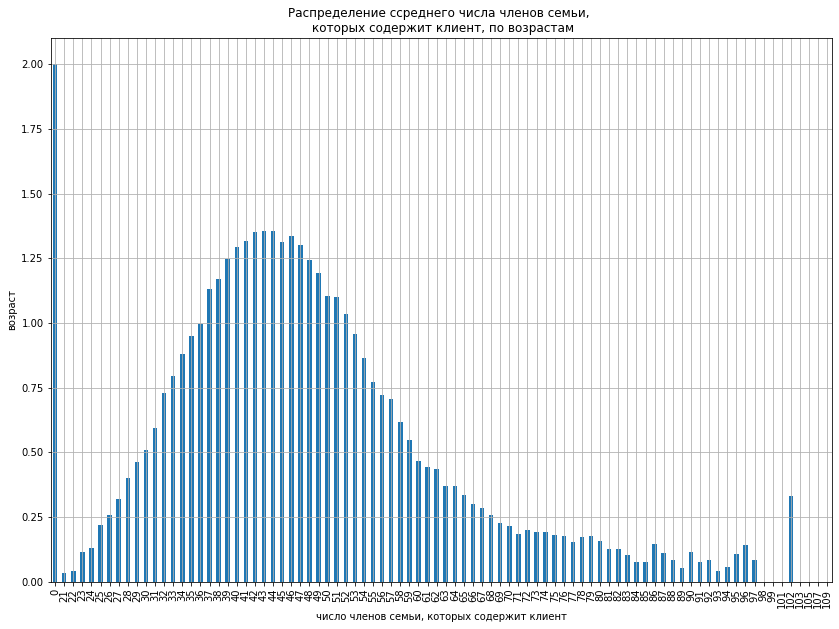

**Задание 18 (1 балл)** Видите ли вы теперь какие-то аномалии в данных? Определите, что это за аномалии, и очистите данные от этих аномалий. Затем снова постройте такой же график, как в предыдущем задании, только уже на датафрейме с очищенными выбросами